# Lab Assignment 2

In the third assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning () repository on Github.

### Deadline October 26th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Scikit-learn has the dataset built in. The dataset contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the following cell shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
[[0 1 2 3 4]
 [5 6 7 8 9]]


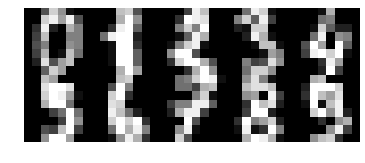

In [2]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)), interpolation="nearest")

print "The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10]))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. Also pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner.

Plot how your score on the test set improves over time. My best score was about 85% correct!

Make sure to comment your code.

In [3]:
#Make a prediction function h
def prediction_function(x,theta):
    """Computes the hypothesis for every x and theta.
    x  = array of dimensions (64,1)
    theta = array of dimensions (64, 10)
    output = array of (10,1)
    """
    return np.divide(1, np.add(1, np.exp(np.multiply(-1, np.dot(x, theta)))))    

In [4]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):        
    """Computes the cost function for a certain hypothesis.
    x_predict : array of dimensions (10,1)
    y         : number
    output    : number"""
    return ((x_predict.argmax() - y) ** 2)/2

In [5]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
    """For every x and y combination it computes the derivative relative to both theta0 and theta1.
    x_predict  : array (10,1)
    x          : array (1,64)
    y          : array (10,1)
    output     : array (10,64)
    """
    x = np.copy(x)
    m = x_predict.shape[0]
    gradient = np.outer((x_predict - y), x)
    return gradient

start


D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: overflow encountered in exp


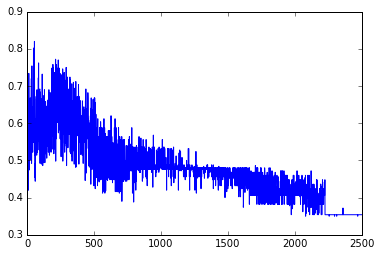

training done
accuracy training set: 

NameError: name 'x' is not defined

In [7]:
#Choose a suitable learning rate
alpha = 0.1 # learning rate
iterations = 2500 # Experiments show this is the amount of iterations after which the cost converges.
theta = np.zeros((64,10))
stop_condition = 0.2 # Stop when the cost_function result is smaller than this value

#It is important to check that you're not overfitting by testing your prediction on a testset
x_train = np.reshape(digits.images[:1000],(1000,64))
x_cross_validation = np.reshape(digits.images[1000:1500], (500,64))
x_test = np.reshape(digits.images[1500:],(297,64))

target_train = digits.target[:1000]
target_cross_validation = digits.target[1000:1500]
target_test = digits.target[1500:]


def training_function(x, target, x_cv, target_cv, theta):
    """Takes a training set with a corresponding target set and theta.
    It outputs the theta that gives the best hypothesis."""
    theta = theta
    m = x.shape[0]
    cost_plot = []
    for i in range(iterations):
        cost_counter = 0
        for j in range(x.shape[0]):
            x_current = x[j,:]
            x_predict = prediction_function(x_current.T,theta)
            y = np.zeros(10)
            y[target[j]] = 1
            theta = np.add(theta, np.multiply(-alpha, compute_gradient(x_predict, y, x_current).T)) 
        for k in range(x_cv.shape[0]):
            # Use the cross validation set to stop overfitting.
            cost_counter = cost_counter + cost_function(prediction_function(x_cv[k,:], theta), target_cv[k])
        cost = (float(cost_counter) / m) 
        cost_plot.append(cost)
        if cost < stop_condition:
            plt.plot(cost_plot, range(i))
            print "iteration: ", i
            break
    plt.plot(range(iterations), cost_plot)
    plt.show()
    return theta
    
    
def prediction_test(x, target, theta):
    """Takes a set x and predicts the corresponding values y, using
    the hypothesis created with theta. Counts the good predictions and
    returns an accuracy percentage."""
    good_predictions = 0
    for i in range(x.shape[0]):
        x_predict = prediction_function(x[i,:].T, theta)
        if x_predict.argmax() == target[i]:
            good_predictions += 1
    return float(good_predictions) / x.shape[0] * 100

print "start"
training = training_function(x_train, target_train, x_cross_validation, target_cross_validation, theta)
print "training done"
accuracy = prediction_test(x_test, target_test, training)
accuracy_2 = prediction_test(x_cross_validation, target_cross_validation, training)
print "accuracy training set: ", prediction_test(x, target, training)
print "accuracy test set: ", accuracy
print "accuracy cross validation set: ", accuracy_2